In [2]:
import numpy as np
from cvxopt import matrix, solvers


P = np.array([[2.0, 0.0], [0.0, 8.0]])  
q = np.array([-8.0, -16.0])  


P = matrix(P)
q = matrix(q)


G = np.array([[1.0, 1.0], [-1.0, 0.0], [0.0, -1.0]])
h = np.array([5.0, 3.0, 0.0])

G = matrix(G)
h = matrix(h)


solution = solvers.qp(P, q, G, h)


x_opt = np.array(solution['x']).flatten()
print("Оптимальное решение:", x_opt)


active_constraints = []
for i in range(G.size[0]):
    if np.dot(G[i,:], x_opt) == h[i]:
        active_constraints.append(i)

print("Активные ограничения:", active_constraints)


     pcost       dcost       gap    pres   dres
 0: -2.8060e+01 -4.6248e+01  2e+01  0e+00  0e+00
 1: -3.0510e+01 -3.1641e+01  1e+00  2e-16  1e-16
 2: -3.1143e+01 -3.1205e+01  6e-02  2e-16  5e-17
 3: -3.1199e+01 -3.1200e+01  7e-04  8e-17  1e-17
 4: -3.1200e+01 -3.1200e+01  7e-06  2e-16  4e-17
Optimal solution found.
Оптимальное решение: [3.19999666 1.79999918]
Активные ограничения: []


In [6]:
import numpy as np
from cvxopt import matrix, solvers

class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
      
        P = np.diag(np.ones(n_features))  # P = I
        P = np.concatenate((P, np.zeros((n_features, 1))), axis=1)
        P = np.concatenate((P, np.zeros((1, n_features + 1))), axis=0)
        
        
        y_reshaped = y.reshape(-1, 1) 
        q = np.zeros(n_features + 1)
        
       
        G = np.zeros((2 * n_samples, n_features + 1))
        h = np.zeros(2 * n_samples)

        
        for i in range(n_samples):
            G[i, :n_features] = -y[i] * X[i]
            G[i, n_features] = 0  
            h[i] = -1  
            
            G[n_samples + i, :n_features] = y[i] * X[i]
            G[n_samples + i, n_features] = -1  # ξn
            h[n_samples + i] = self.C  # ξn ≤ C

       
        P = matrix(P)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)

    
        solution = solvers.qp(P, q, G, h)
       
        self.w = np.array(solution['x'][:-1]).flatten()
        self.b = solution['x'][-1]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

if __name__ == "__main__":
    
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    
    X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
    y = np.where(y == 0, -1, 1)  

  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  
    svm = LinearSVM(C=1.0)
    svm.fit(X_train, y_train)

 
    predictions = svm.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    print("Точность:", accuracy)


     pcost       dcost       gap    pres   dres
 0:  4.1888e-02  3.5132e+01  4e+02  2e+00  1e+02
 1:  2.6335e-01 -8.6725e+01  1e+02  6e-01  4e+01
 2:  5.2819e-01 -9.1620e+01  1e+02  5e-01  3e+01
 3:  9.4369e-01 -1.5966e+01  2e+01  8e-02  5e+00
 4:  1.0464e+00  3.3885e-01  7e-01  2e-03  1e-01
 5:  9.2066e-01  8.6933e-01  5e-02  1e-04  6e-03
 6:  9.1127e-01  9.1046e-01  8e-04  2e-06  1e-04
 7:  9.1112e-01  9.1111e-01  8e-06  2e-08  1e-06
 8:  9.1112e-01  9.1112e-01  8e-08  2e-10  1e-08
Optimal solution found.
Точность: 0.4666666666666667


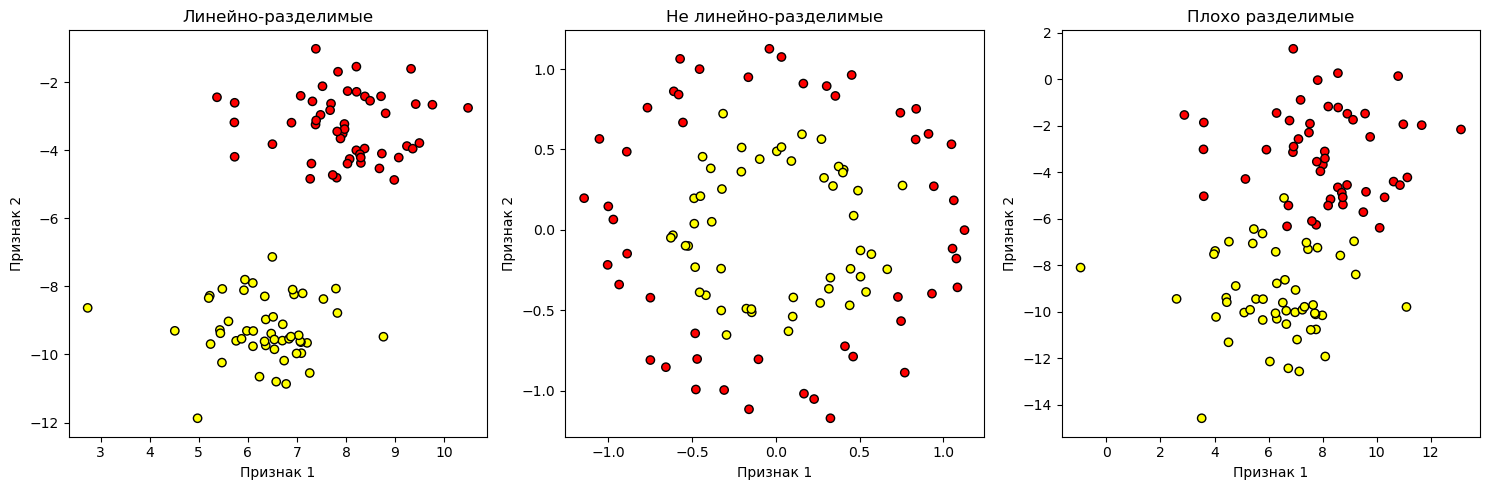

     pcost       dcost       gap    pres   dres
 0:  4.1888e-02  3.5132e+01  4e+02  2e+00  1e+02
 1:  2.6335e-01 -8.6725e+01  1e+02  6e-01  4e+01
 2:  5.2819e-01 -9.1620e+01  1e+02  5e-01  3e+01
 3:  9.4369e-01 -1.5966e+01  2e+01  8e-02  5e+00
 4:  1.0464e+00  3.3885e-01  7e-01  2e-03  1e-01
 5:  9.2066e-01  8.6933e-01  5e-02  1e-04  6e-03
 6:  9.1127e-01  9.1046e-01  8e-04  2e-06  1e-04
 7:  9.1112e-01  9.1111e-01  8e-06  2e-08  1e-06
 8:  9.1112e-01  9.1112e-01  8e-08  2e-10  1e-08
Optimal solution found.
Точность для Линейно-разделимые: 0.47
     pcost       dcost       gap    pres   dres
 0:  1.0024e-02  1.5034e+02  4e+02  2e+00  8e+01
 1:  1.0056e-03  3.0016e+02  1e+02  1e+00  4e+01
 2:  8.5226e-05  4.6313e+03  2e+02  1e+00  4e+01
 3:  2.0769e-05  1.6266e+05  1e+03  1e+00  4e+01
 4:  2.2958e-07  1.9698e+07  2e+04  1e+00  4e+01
 5:  8.5471e-11  2.4531e+10  4e+05  1e+00  4e+01
 6:  9.2332e-15  1.5959e+15  3e+08  1e+00  4e+01
 7:  9.2907e-19  9.9924e+21  2e+13  1e+00  1e+05
 8:  2.86

AttributeError: 'list' object has no attribute 'make_blobs'

In [14]:
import numpy as np
from cvxopt import matrix, solvers
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        P = np.diag(np.ones(n_features))
        P = np.concatenate((P, np.zeros((n_features, 1))), axis=1)
        P = np.concatenate((P, np.zeros((1, n_features + 1))), axis=0)

        y_reshaped = y.reshape(-1, 1)
        q = np.zeros(n_features + 1)

        G = np.zeros((2 * n_samples, n_features + 1))
        h = np.zeros(2 * n_samples)

        for i in range(n_samples):
            G[i, :n_features] = -y[i] * X[i]
            G[i, n_features] = 0
            h[i] = -1
            
            G[n_samples + i, :n_features] = y[i] * X[i]
            G[n_samples + i, n_features] = -1
            h[n_samples + i] = self.C

        P = matrix(P)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)

        solution = solvers.qp(P, q, G, h)
        self.w = np.array(solution['x'][:-1]).flatten()
        self.b = solution['x'][-1]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

def generate_datasets():
    datasets_list = []

    # Линейно-разделимые классы
    X1, y1 = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
    y1 = np.where(y1 == 0, -1, 1)
    datasets_list.append((X1, y1, "Линейно-разделимые"))

    X2, y2 = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1)
    y2 = np.where(y2 == 0, -1, 1)
    datasets_list.append((X2, y2, "Не линейно-разделимые"))

    #
    X3, y3 = datasets.make_blobs(n_samples=100, centers=2, cluster_std=2.0, random_state=6)
    y3 = np.where(y3 == 0, -1, 1)
    datasets_list.append((X3, y3, "Плохо разделимые"))

    return datasets_list

def plot_datasets(datasets):
    plt.figure(figsize=(15, 5))
    for i, (X, y, title) in enumerate(datasets):
        plt.subplot(1, 3, i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k')
        plt.title(title)
        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    datasets = generate_datasets()
    plot_datasets(datasets)

    for X, y, title in datasets:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        svm = LinearSVM(C=1.0)
        svm.fit(X_train, y_train)
        predictions = svm.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print(f"Точность для {title}: {accuracy:.2f}")




     pcost       dcost       gap    pres   dres
 0:  4.1888e-02  3.5132e+01  4e+02  3e+00  1e+02
 1:  2.6335e-01 -8.6725e+01  1e+02  9e-01  4e+01
 2:  5.2819e-01 -9.1620e+01  1e+02  6e-01  3e+01
 3:  9.4369e-01 -1.5966e+01  2e+01  1e-01  5e+00
 4:  1.0464e+00  3.3885e-01  7e-01  2e-03  1e-01
 5:  9.2066e-01  8.6933e-01  5e-02  1e-04  6e-03
 6:  9.1127e-01  9.1046e-01  8e-04  2e-06  1e-04
 7:  9.1112e-01  9.1111e-01  8e-06  2e-08  1e-06
 8:  9.1112e-01  9.1112e-01  8e-08  2e-10  1e-08
Optimal solution found.


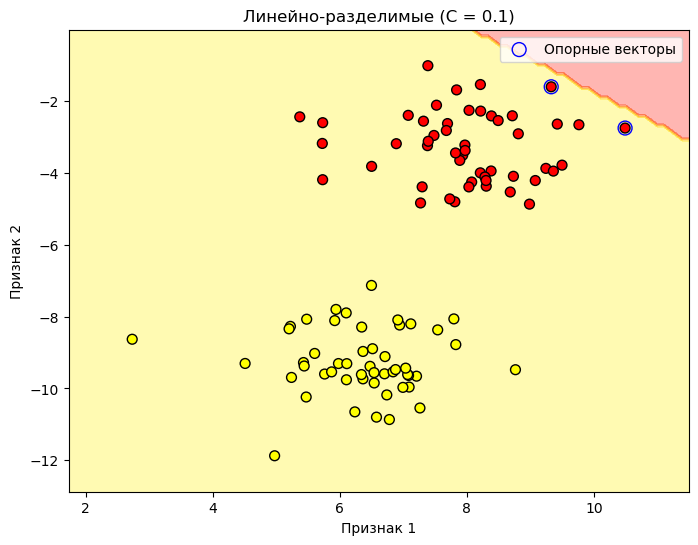

     pcost       dcost       gap    pres   dres
 0:  4.1888e-02  3.5132e+01  4e+02  2e+00  1e+02
 1:  2.6335e-01 -8.6725e+01  1e+02  6e-01  4e+01
 2:  5.2819e-01 -9.1620e+01  1e+02  5e-01  3e+01
 3:  9.4369e-01 -1.5966e+01  2e+01  8e-02  5e+00
 4:  1.0464e+00  3.3885e-01  7e-01  2e-03  1e-01
 5:  9.2066e-01  8.6933e-01  5e-02  1e-04  6e-03
 6:  9.1127e-01  9.1046e-01  8e-04  2e-06  1e-04
 7:  9.1112e-01  9.1111e-01  8e-06  2e-08  1e-06
 8:  9.1112e-01  9.1112e-01  8e-08  2e-10  1e-08
Optimal solution found.


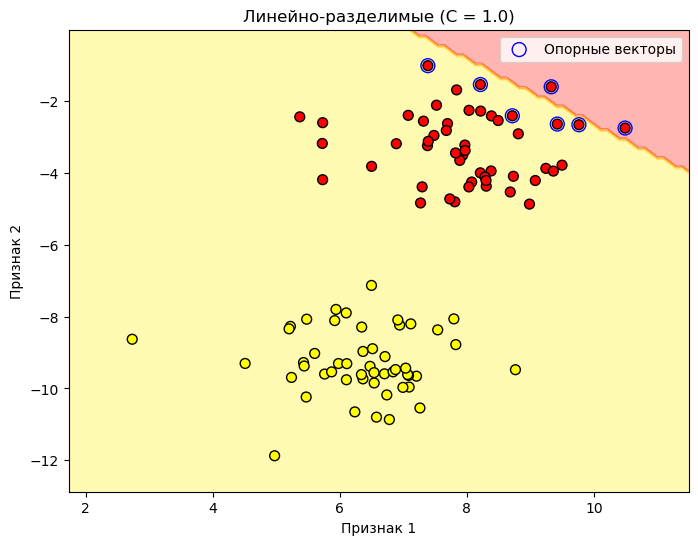

     pcost       dcost       gap    pres   dres
 0:  4.1888e-02  3.5132e+01  4e+02  3e-01  1e+02
 1:  2.6335e-01 -8.6725e+01  1e+02  9e-02  4e+01
 2:  5.2819e-01 -9.1620e+01  1e+02  6e-02  3e+01
 3:  9.4369e-01 -1.5966e+01  2e+01  1e-02  5e+00
 4:  1.0464e+00  3.3885e-01  7e-01  2e-04  1e-01
 5:  9.2066e-01  8.6933e-01  5e-02  1e-05  6e-03
 6:  9.1127e-01  9.1046e-01  8e-04  2e-07  1e-04
 7:  9.1112e-01  9.1111e-01  8e-06  2e-09  1e-06
 8:  9.1112e-01  9.1112e-01  8e-08  2e-11  1e-08
Optimal solution found.


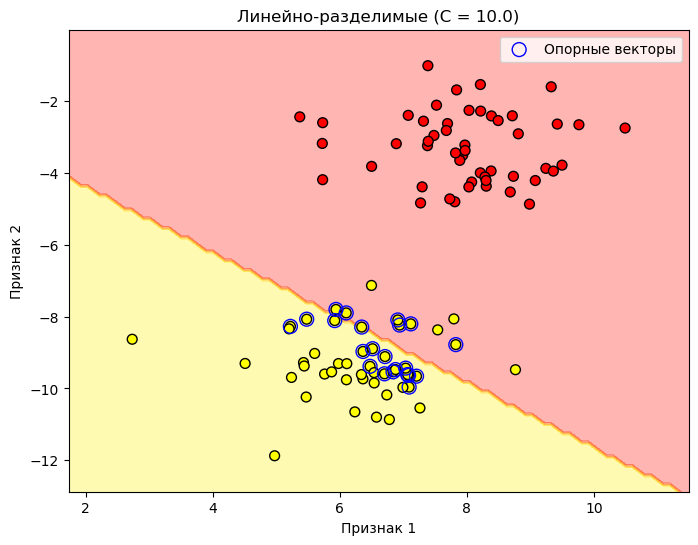

     pcost       dcost       gap    pres   dres
 0:  7.1516e-03  1.4794e+02  3e+02  3e+00  8e+01
 1:  8.8849e-04  3.0126e+02  1e+02  1e+00  4e+01
 2:  3.2251e-05  5.3998e+03  1e+02  1e+00  4e+01
 3:  7.9701e-06  3.0905e+05  1e+03  1e+00  4e+01
 4:  4.5028e-08  6.3845e+07  2e+04  1e+00  4e+01
 5:  9.7895e-12  1.8591e+11  9e+05  1e+00  4e+01
 6:  9.9981e-16  3.6908e+16  2e+09  1e+00  4e+01
 7:  1.0725e-19  7.2487e+23  4e+14  1e+00  4e+06
 8:  1.5194e-23  1.3728e+33  9e+21  1e+00  4e+16
 9:  1.4829e-23  7.5697e+41  5e+30  1e+00  4e+25
10:  1.4826e-23  1.1542e+46  7e+34  1e+00  3e+29
11:  1.4826e-23  3.4420e+46  2e+35  1e+00  4e+29
12:  1.4826e-23  1.1561e+47  7e+35  1e+00  1e+31
13:  1.4826e-23  3.2474e+47  2e+36  1e+00  8e+30
14:  1.4826e-23  1.0660e+48  7e+36  1e+00  2e+31
15:  1.4826e-23  2.9755e+48  2e+37  1e+00  1e+32
16:  1.4826e-23  9.7440e+48  6e+37  1e+00  3e+32
17:  1.4826e-23  2.7179e+49  2e+38  1e+00  7e+32
18:  1.4826e-23  8.8979e+49  6e+38  1e+00  5e+33
19:  1.4826e-23  2.48

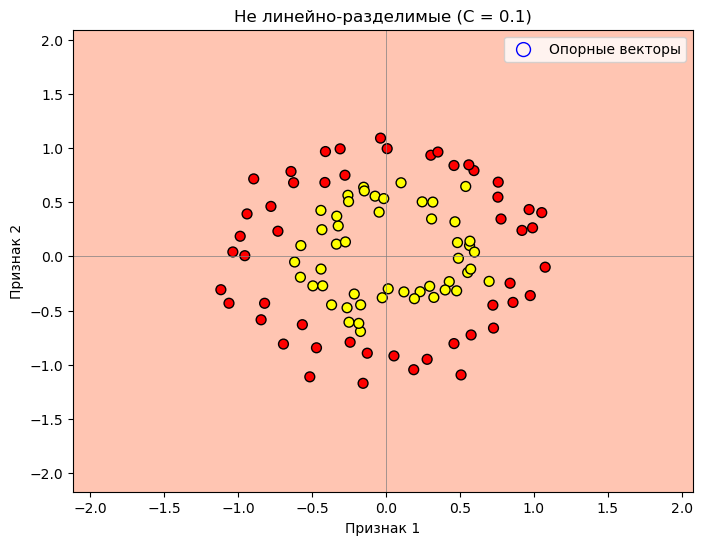

     pcost       dcost       gap    pres   dres
 0:  7.1516e-03  1.4794e+02  3e+02  2e+00  8e+01
 1:  8.8849e-04  3.0126e+02  1e+02  1e+00  4e+01
 2:  3.2251e-05  5.3998e+03  1e+02  1e+00  4e+01
 3:  7.9701e-06  3.0905e+05  1e+03  1e+00  4e+01
 4:  4.5028e-08  6.3845e+07  2e+04  1e+00  4e+01
 5:  9.7895e-12  1.8592e+11  9e+05  1e+00  4e+01
 6:  1.0004e-15  3.6908e+16  2e+09  1e+00  4e+01
 7:  1.0166e-19  7.2486e+23  4e+14  1e+00  2e+07
 8:  1.5530e-23  1.4075e+33  9e+21  1e+00  5e+16
 9:  1.5071e-23  4.6086e+41  3e+30  1e+00  7e+25
10:  1.5065e-23  3.2295e+47  2e+36  1e+00  2e+31
11:  1.5065e-23  9.5789e+47  6e+36  1e+00  2e+31
12:  1.5065e-23  3.2095e+48  2e+37  1e+00  1e+32
13:  1.5065e-23  9.0051e+48  6e+37  1e+00  4e+32
14:  1.5065e-23  2.9535e+49  2e+38  1e+00  8e+32
15:  1.5065e-23  8.2377e+49  5e+38  1e+00  1e+33
16:  1.5065e-23  2.6956e+50  2e+39  1e+00  5e+33
17:  1.5065e-23  7.5135e+50  5e+39  1e+00  2e+34
18:  1.5065e-23  2.4580e+51  2e+40  1e+00  1e+35
19:  1.5065e-23  6.85

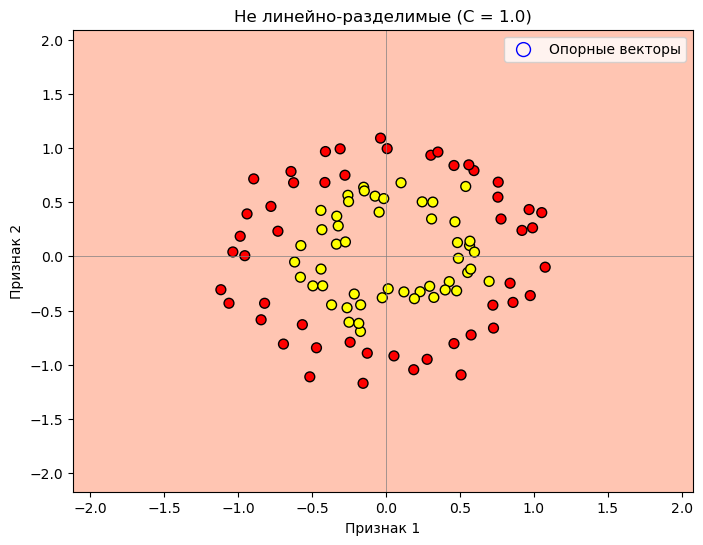

     pcost       dcost       gap    pres   dres
 0:  7.1516e-03  1.4794e+02  3e+02  3e-01  8e+01
 1:  8.8849e-04  3.0126e+02  1e+02  1e-01  4e+01
 2:  3.2251e-05  5.3998e+03  1e+02  1e-01  4e+01
 3:  7.9701e-06  3.0905e+05  1e+03  1e-01  4e+01
 4:  4.5028e-08  6.3845e+07  2e+04  1e-01  4e+01
 5:  9.7894e-12  1.8592e+11  9e+05  1e-01  4e+01
 6:  1.0001e-15  3.6908e+16  2e+09  1e-01  4e+01
 7:  1.1659e-19  7.2445e+23  4e+14  1e-01  2e+07
 8:  1.2752e-23  1.3169e+33  8e+21  1e-01  7e+16
 9:  1.3714e-23  3.2715e+41  2e+30  1e-01  1e+25
10:  1.3712e-23  2.5152e+45  1e+34  1e-01  2e+29
11:  1.3712e-23  7.5150e+45  4e+34  1e-01  3e+29
12:  1.3712e-23  2.5317e+46  1e+35  1e-01  7e+29
13:  1.3712e-23  7.1331e+46  4e+35  1e-01  1e+30
14:  1.3712e-23  2.3496e+47  1e+36  1e-01  6e+30
15:  1.3712e-23  6.5790e+47  4e+36  1e-01  1e+31
16:  1.3712e-23  2.1619e+48  1e+37  1e-01  1e+31
17:  1.3712e-23  6.0493e+48  4e+37  1e-01  2e+32
18:  1.3712e-23  1.9873e+49  1e+38  1e-01  6e+32
19:  1.3712e-23  5.56

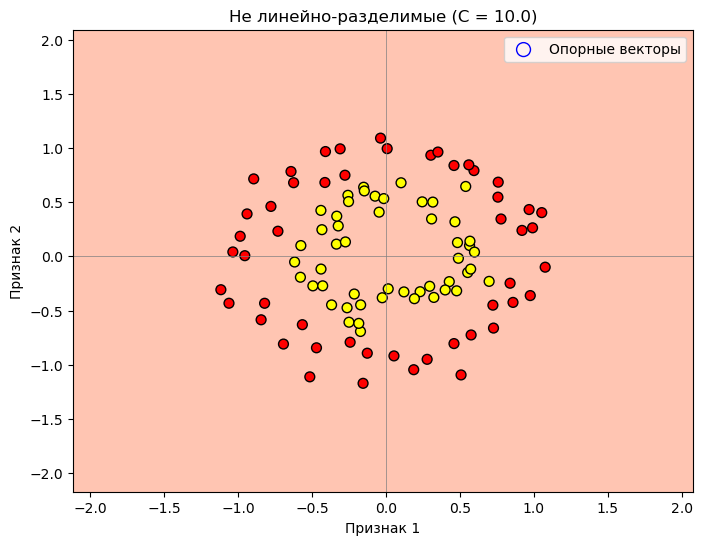

     pcost       dcost       gap    pres   dres
 0:  1.7037e-02  9.0086e+01  6e+02  3e+00  1e+02
 1:  6.7028e-02 -3.9867e+01  4e+02  2e+00  9e+01
 2:  2.4289e-02  1.8589e+02  5e+02  2e+00  9e+01
 3:  2.6152e-04  9.0549e+02  4e+02  2e+00  7e+01
 4:  1.3020e-04  3.2181e+03  6e+02  2e+00  6e+01
 5:  2.6464e-05  1.8932e+04  1e+03  1e+00  6e+01
 6:  1.8409e-05  8.2194e+04  4e+03  1e+00  6e+01
 7:  1.1923e-05  4.3802e+05  2e+04  1e+00  6e+01
 8:  4.4245e-06  5.1046e+06  1e+05  1e+00  6e+01
 9:  1.8684e-07  1.8409e+08  9e+05  1e+00  6e+01
10:  3.4231e-10  3.7371e+10  8e+06  1e+00  6e+01
11:  1.2797e-13  1.7995e+14  7e+08  1e+00  1e+02
12:  1.2987e-17  4.5211e+19  2e+12  1e+00  9e+05
13:  4.1519e-21  1.0756e+27  8e+17  1e+00  2e+12
14:  4.4175e-25  1.4650e+36  1e+25  1e+00  3e+21
15:  4.3207e-25  5.6667e+42  5e+31  1e+00  5e+27
16:  4.3207e-25  1.4915e+44  1e+33  1e+00  1e+29
17:  4.3207e-25  1.5897e+45  1e+34  1e+00  1e+30
18:  4.3207e-25  3.6809e+45  3e+34  1e+00  3e+30
19:  4.3207e-25  2.46

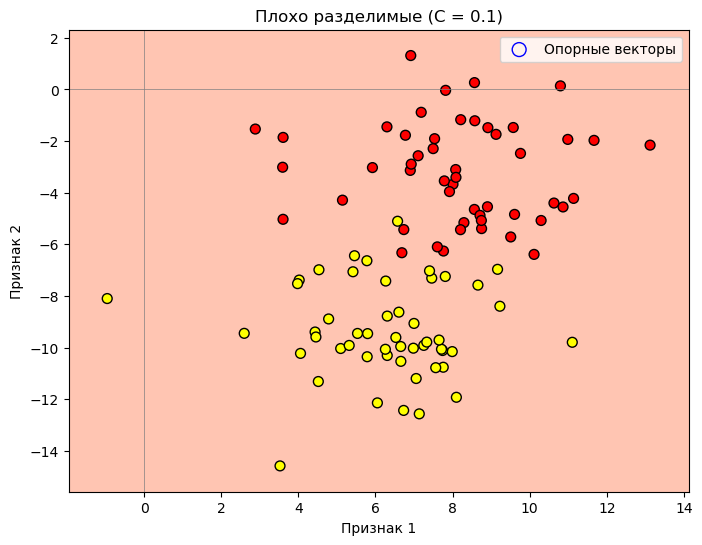

     pcost       dcost       gap    pres   dres
 0:  1.7037e-02  9.0086e+01  6e+02  2e+00  1e+02
 1:  6.7028e-02 -3.9867e+01  4e+02  2e+00  9e+01
 2:  2.4289e-02  1.8589e+02  5e+02  2e+00  9e+01
 3:  2.6152e-04  9.0549e+02  4e+02  1e+00  7e+01
 4:  1.3020e-04  3.2181e+03  6e+02  1e+00  6e+01
 5:  2.6464e-05  1.8932e+04  1e+03  1e+00  6e+01
 6:  1.8409e-05  8.2194e+04  4e+03  1e+00  6e+01
 7:  1.1923e-05  4.3802e+05  2e+04  1e+00  6e+01
 8:  4.4245e-06  5.1046e+06  1e+05  1e+00  6e+01
 9:  1.8684e-07  1.8409e+08  9e+05  1e+00  6e+01
10:  3.4324e-10  3.7369e+10  8e+06  1e+00  6e+01
11:  6.6171e-14  1.8069e+14  5e+08  1e+00  6e+01
12:  9.2306e-15  3.9970e+19  4e+13  1e+00  1e+06
13:  1.1570e-18  3.7199e+25  6e+17  1e+00  5e+12
14:  2.6189e-22  2.2117e+33  7e+23  1e+00  2e+18
15:  1.2345e-25  6.7077e+42  4e+31  1e+00  1e+28
16:  1.2345e-25  3.2074e+45  2e+34  1e+00  7e+30
17:  1.2345e-25  2.7180e+46  2e+35  1e+00  3e+31
18:  1.2345e-25  6.2384e+46  3e+35  1e+00  6e+31
19:  1.2345e-25  4.16

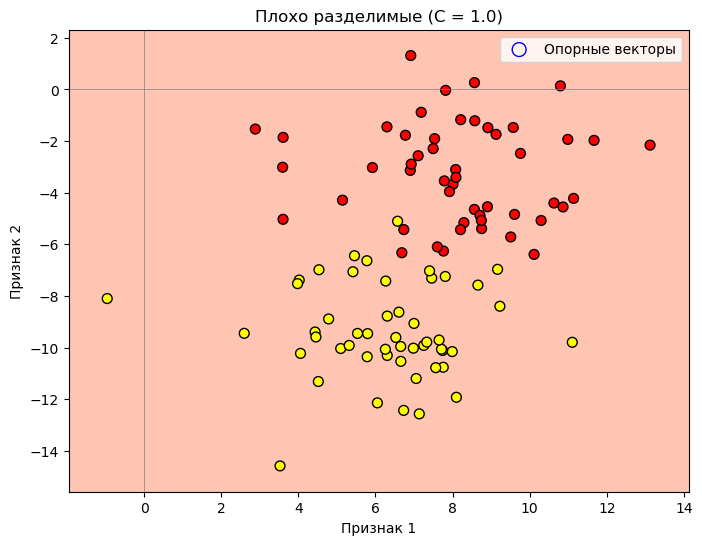

     pcost       dcost       gap    pres   dres
 0:  1.7037e-02  9.0086e+01  6e+02  3e-01  1e+02
 1:  6.7028e-02 -3.9867e+01  4e+02  2e-01  9e+01
 2:  2.4289e-02  1.8589e+02  5e+02  2e-01  9e+01
 3:  2.6152e-04  9.0549e+02  4e+02  2e-01  7e+01
 4:  1.3020e-04  3.2181e+03  6e+02  2e-01  6e+01
 5:  2.6464e-05  1.8932e+04  1e+03  1e-01  6e+01
 6:  1.8409e-05  8.2194e+04  4e+03  1e-01  6e+01
 7:  1.1923e-05  4.3802e+05  2e+04  1e-01  6e+01
 8:  4.4245e-06  5.1046e+06  1e+05  1e-01  6e+01
 9:  1.8684e-07  1.8409e+08  9e+05  1e-01  6e+01
10:  3.4102e-10  3.7374e+10  8e+06  1e-01  6e+01
11:  6.6795e-14  1.8129e+14  5e+08  1e-01  1e+02
12:  6.7572e-18  6.3047e+19  2e+12  1e-01  1e+06
13:  6.9660e-22  2.1104e+27  7e+17  1e-01  4e+11
14:  7.2771e-26  6.4880e+36  2e+25  1e-01  6e+21
15:  4.8930e-26  3.2423e+43  1e+32  1e-01  5e+27
16:  4.8919e-26  1.0022e+47  4e+35  1e-01  3e+31
17:  4.8919e-26  1.1023e+48  4e+36  1e-01  3e+32
18:  4.8919e-26  2.5511e+48  9e+36  1e-01  3e+33
19:  4.8919e-26  1.70

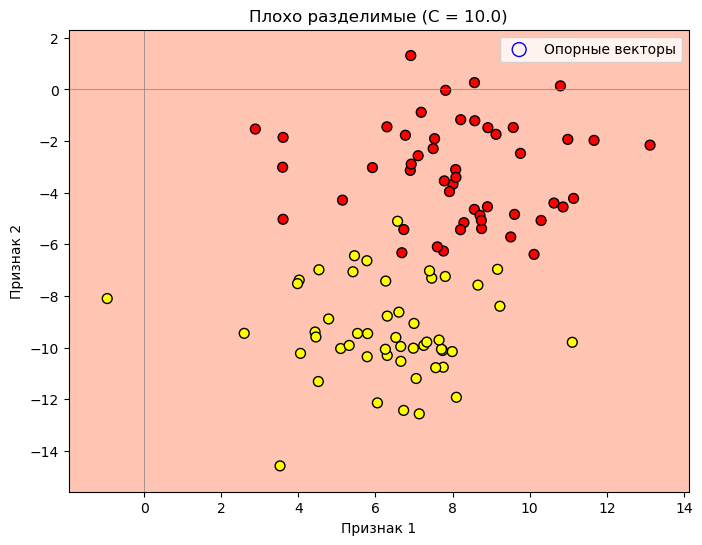

In [20]:
import numpy as np
from cvxopt import matrix, solvers
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        P = np.diag(np.ones(n_features))
        P = np.concatenate((P, np.zeros((n_features, 1))), axis=1)
        P = np.concatenate((P, np.zeros((1, n_features + 1))), axis=0)

        y_reshaped = y.reshape(-1, 1)
        q = np.zeros(n_features + 1)

        G = np.zeros((2 * n_samples, n_features + 1))
        h = np.zeros(2 * n_samples)

        for i in range(n_samples):
            G[i, :n_features] = -y[i] * X[i]
            G[i, n_features] = 0
            h[i] = -1
            
            G[n_samples + i, :n_features] = y[i] * X[i]
            G[n_samples + i, n_features] = -1
            h[n_samples + i] = self.C

        P = matrix(P)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)

        solution = solvers.qp(P, q, G, h)
        self.w = np.array(solution['x'][:-1]).flatten()
        self.b = solution['x'][-1]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

def generate_datasets():
    datasets_list = []

    X1, y1 = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
    y1 = np.where(y1 == 0, -1, 1)
    datasets_list.append((X1, y1, "Линейно-разделимые"))

    X2, y2 = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1)
    y2 = np.where(y2 == 0, -1, 1)
    datasets_list.append((X2, y2, "Не линейно-разделимые"))

    X3, y3 = datasets.make_blobs(n_samples=100, centers=2, cluster_std=2.0, random_state=6)
    y3 = np.where(y3 == 0, -1, 1)
    datasets_list.append((X3, y3, "Плохо разделимые"))

    return datasets_list

def plot_decision_boundary(svm, X, y, title, C):
    plt.figure(figsize=(8, 6))
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='autumn')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k', s=50)

    # Выделение опорных векторов
    if svm.w is not None:
        margins = np.abs(np.dot(X, svm.w) + svm.b)
        support_vectors = margins < 1
        plt.scatter(X[support_vectors, 0], X[support_vectors, 1], 
                    facecolors='none', s=100, edgecolors='blue', label='Опорные векторы')

    plt.title(f"{title} (C = {C})")
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    
    # Добавляем легенду
    plt.legend(loc='best')
    plt.show()

if __name__ == "__main__":
    datasets = generate_datasets()
    
    C_values = [0.1, 1.0, 10.0]
    
    for X, y, title in datasets:
        for C in C_values:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            svm = LinearSVM(C=C)
            svm.fit(X_train, y_train)
            plot_decision_boundary(svm, X, y, title, C)


     pcost       dcost       gap    pres   dres
 0:  4.1888e-02  3.5132e+01  4e+02  3e+00  1e+02
 1:  2.6335e-01 -8.6725e+01  1e+02  9e-01  4e+01
 2:  5.2819e-01 -9.1620e+01  1e+02  6e-01  3e+01
 3:  9.4369e-01 -1.5966e+01  2e+01  1e-01  5e+00
 4:  1.0464e+00  3.3885e-01  7e-01  2e-03  1e-01
 5:  9.2066e-01  8.6933e-01  5e-02  1e-04  6e-03
 6:  9.1127e-01  9.1046e-01  8e-04  2e-06  1e-04
 7:  9.1112e-01  9.1111e-01  8e-06  2e-08  1e-06
 8:  9.1112e-01  9.1112e-01  8e-08  2e-10  1e-08
Optimal solution found.


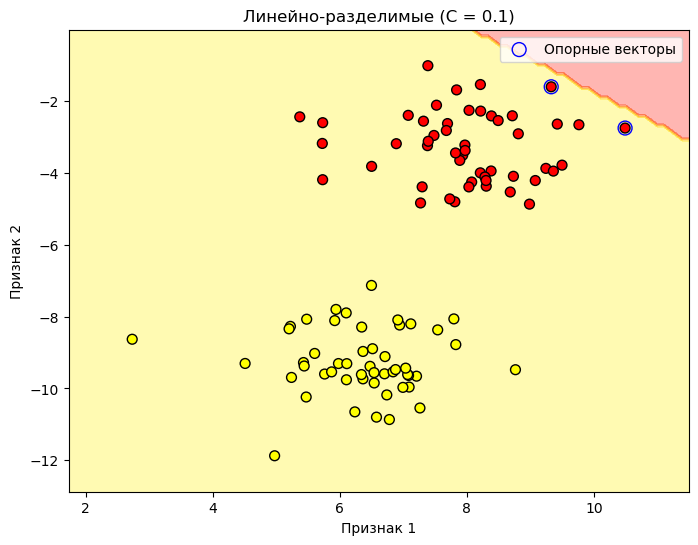

     pcost       dcost       gap    pres   dres
 0:  4.1888e-02  3.5132e+01  4e+02  2e+00  1e+02
 1:  2.6335e-01 -8.6725e+01  1e+02  6e-01  4e+01
 2:  5.2819e-01 -9.1620e+01  1e+02  5e-01  3e+01
 3:  9.4369e-01 -1.5966e+01  2e+01  8e-02  5e+00
 4:  1.0464e+00  3.3885e-01  7e-01  2e-03  1e-01
 5:  9.2066e-01  8.6933e-01  5e-02  1e-04  6e-03
 6:  9.1127e-01  9.1046e-01  8e-04  2e-06  1e-04
 7:  9.1112e-01  9.1111e-01  8e-06  2e-08  1e-06
 8:  9.1112e-01  9.1112e-01  8e-08  2e-10  1e-08
Optimal solution found.


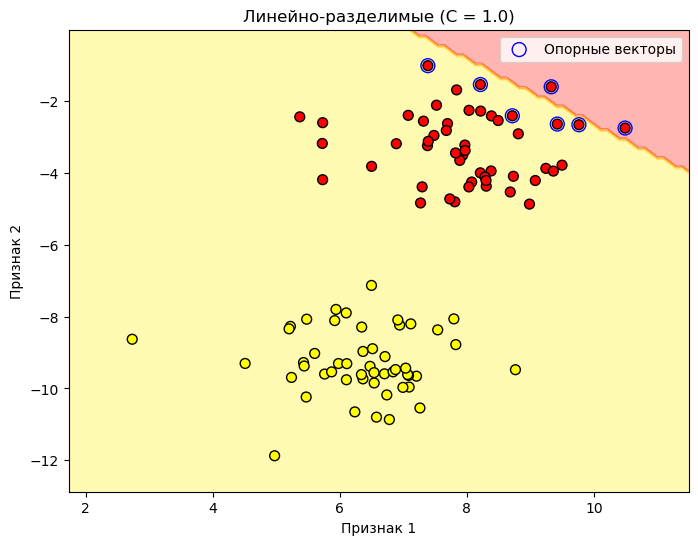

     pcost       dcost       gap    pres   dres
 0:  4.1888e-02  3.5132e+01  4e+02  3e-01  1e+02
 1:  2.6335e-01 -8.6725e+01  1e+02  9e-02  4e+01
 2:  5.2819e-01 -9.1620e+01  1e+02  6e-02  3e+01
 3:  9.4369e-01 -1.5966e+01  2e+01  1e-02  5e+00
 4:  1.0464e+00  3.3885e-01  7e-01  2e-04  1e-01
 5:  9.2066e-01  8.6933e-01  5e-02  1e-05  6e-03
 6:  9.1127e-01  9.1046e-01  8e-04  2e-07  1e-04
 7:  9.1112e-01  9.1111e-01  8e-06  2e-09  1e-06
 8:  9.1112e-01  9.1112e-01  8e-08  2e-11  1e-08
Optimal solution found.


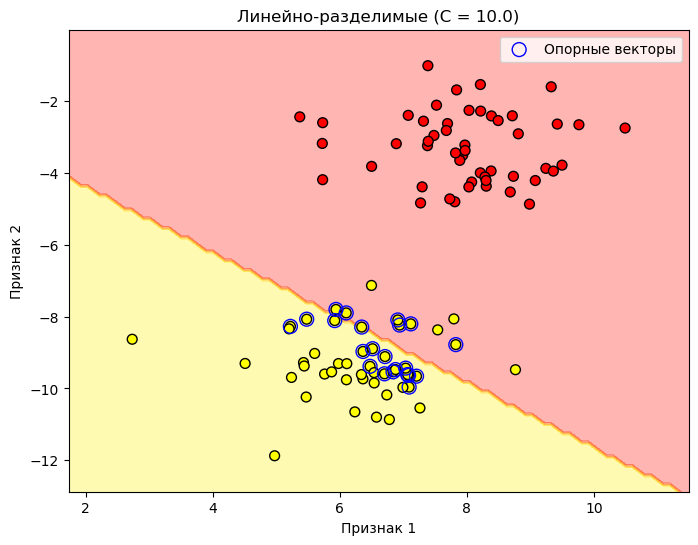

     pcost       dcost       gap    pres   dres
 0:  1.1387e-03  1.4353e+02  3e+02  3e+00  7e+01
 1:  2.8397e-04  3.0665e+02  9e+01  1e+00  4e+01
 2:  1.8486e-09  1.0171e+04  8e+01  1e+00  4e+01
 3:  1.0419e-08  1.3268e+07  2e+03  1e+00  4e+01
 4:  2.7840e-12  8.5037e+10  2e+05  1e+00  4e+01
 5:  2.8253e-16  3.3995e+16  8e+08  1e+00  4e+01
 6:  2.8253e-20  1.3493e+24  3e+14  1e+00  4e+07
 7:  4.9454e-24  5.2321e+33  4e+22  1e+00  9e+16
 8:  2.8903e-23  3.1858e+42  3e+31  1e+00  3e+25
 9:  2.8902e-23  3.7236e+46  3e+35  1e+00  4e+29
10:  2.8902e-23  1.1762e+47  1e+36  1e+00  2e+30
11:  2.8902e-23  3.4914e+47  3e+36  1e+00  1e+31
12:  2.8902e-23  1.0749e+48  9e+36  1e+00  3e+31
13:  2.8902e-23  3.1614e+48  3e+37  1e+00  6e+31
14:  2.8902e-23  9.7025e+48  8e+37  1e+00  1e+31
15:  2.8902e-23  2.8507e+49  2e+38  1e+00  2e+33
16:  2.8902e-23  8.7460e+49  7e+38  1e+00  2e+33
17:  2.8902e-23  2.5694e+50  2e+39  1e+00  9e+33
18:  2.8902e-23  7.8825e+50  6e+39  1e+00  5e+33
19:  2.8902e-23  2.31

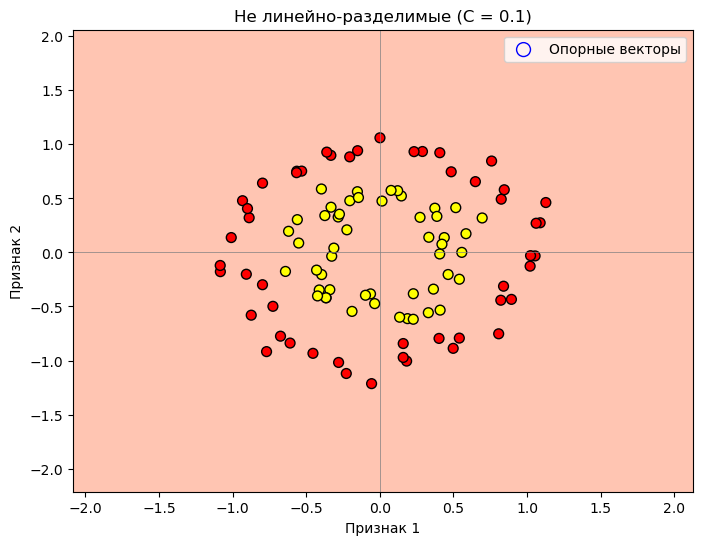

     pcost       dcost       gap    pres   dres
 0:  1.1387e-03  1.4353e+02  3e+02  2e+00  7e+01
 1:  2.8397e-04  3.0665e+02  9e+01  1e+00  4e+01
 2:  1.8486e-09  1.0171e+04  8e+01  1e+00  4e+01
 3:  1.0419e-08  1.3268e+07  2e+03  1e+00  4e+01
 4:  2.7840e-12  8.5037e+10  2e+05  1e+00  4e+01
 5:  2.8253e-16  3.3995e+16  8e+08  1e+00  4e+01
 6:  2.8256e-20  1.3493e+24  3e+14  1e+00  3e+07
 7:  5.3083e-25  5.2968e+33  3e+22  1e+00  2e+17
 8:  1.1104e-23  1.3265e+43  7e+31  1e+00  3e+26
 9:  1.1103e-23  3.6586e+46  2e+35  1e+00  5e+29
10:  1.1103e-23  1.1552e+47  6e+35  1e+00  3e+29
11:  1.1103e-23  3.4287e+47  2e+36  1e+00  1e+31
12:  1.1103e-23  1.0557e+48  5e+36  1e+00  1e+31
13:  1.1103e-23  3.1053e+48  2e+37  1e+00  5e+31
14:  1.1103e-23  9.5318e+48  5e+37  1e+00  7e+31
15:  1.1103e-23  2.8010e+49  1e+38  1e+00  5e+32
16:  1.1103e-23  8.5945e+49  4e+38  1e+00  2e+33
17:  1.1103e-23  2.5253e+50  1e+39  1e+00  2e+33
18:  1.1103e-23  7.7483e+50  4e+39  1e+00  1e+34
19:  1.1103e-23  2.27

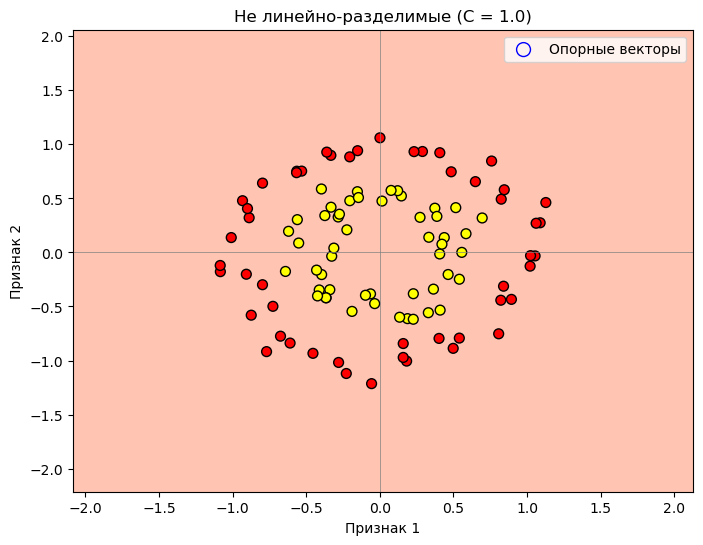

     pcost       dcost       gap    pres   dres
 0:  1.1387e-03  1.4353e+02  3e+02  3e-01  7e+01
 1:  2.8397e-04  3.0665e+02  9e+01  1e-01  4e+01
 2:  1.8486e-09  1.0171e+04  8e+01  1e-01  4e+01
 3:  1.0419e-08  1.3268e+07  2e+03  1e-01  4e+01
 4:  2.7840e-12  8.5037e+10  2e+05  1e-01  4e+01
 5:  2.8253e-16  3.3995e+16  8e+08  1e-01  4e+01
 6:  2.8254e-20  1.3493e+24  3e+14  1e-01  3e+07
 7:  8.6365e-25  5.3140e+33  2e+22  1e-01  1e+17
 8:  8.7311e-24  1.0872e+42  5e+30  1e-01  2e+25
 9:  8.7300e-24  8.4190e+45  4e+34  1e-01  2e+29
10:  8.7300e-24  2.6658e+46  1e+35  1e-01  3e+29
11:  8.7300e-24  7.9203e+46  3e+35  1e-01  9e+29
12:  8.7300e-24  2.4398e+47  1e+36  1e-01  6e+30
13:  8.7300e-24  7.1786e+47  3e+36  1e-01  2e+31
14:  8.7300e-24  2.2040e+48  1e+37  1e-01  7e+31
15:  8.7300e-24  6.4778e+48  3e+37  1e-01  4e+31
16:  8.7300e-24  1.9881e+49  9e+37  1e-01  2e+32
17:  8.7300e-24  5.8425e+49  3e+38  1e-01  3e+33
18:  8.7300e-24  1.7930e+50  8e+38  1e-01  4e+33
19:  8.7300e-24  5.26

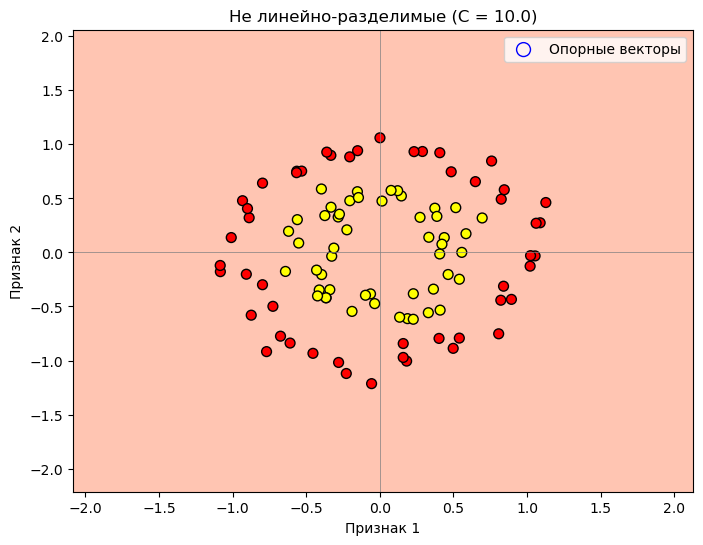

     pcost       dcost       gap    pres   dres
 0:  1.7037e-02  9.0086e+01  6e+02  3e+00  1e+02
 1:  6.7028e-02 -3.9867e+01  4e+02  2e+00  9e+01
 2:  2.4289e-02  1.8589e+02  5e+02  2e+00  9e+01
 3:  2.6152e-04  9.0549e+02  4e+02  2e+00  7e+01
 4:  1.3020e-04  3.2181e+03  6e+02  2e+00  6e+01
 5:  2.6464e-05  1.8932e+04  1e+03  1e+00  6e+01
 6:  1.8409e-05  8.2194e+04  4e+03  1e+00  6e+01
 7:  1.1923e-05  4.3802e+05  2e+04  1e+00  6e+01
 8:  4.4245e-06  5.1046e+06  1e+05  1e+00  6e+01
 9:  1.8684e-07  1.8409e+08  9e+05  1e+00  6e+01
10:  3.4231e-10  3.7371e+10  8e+06  1e+00  6e+01
11:  1.2797e-13  1.7995e+14  7e+08  1e+00  1e+02
12:  1.2987e-17  4.5211e+19  2e+12  1e+00  9e+05
13:  4.1519e-21  1.0756e+27  8e+17  1e+00  2e+12
14:  4.4175e-25  1.4650e+36  1e+25  1e+00  3e+21
15:  4.3207e-25  5.6667e+42  5e+31  1e+00  5e+27
16:  4.3207e-25  1.4915e+44  1e+33  1e+00  1e+29
17:  4.3207e-25  1.5897e+45  1e+34  1e+00  1e+30
18:  4.3207e-25  3.6809e+45  3e+34  1e+00  3e+30
19:  4.3207e-25  2.46

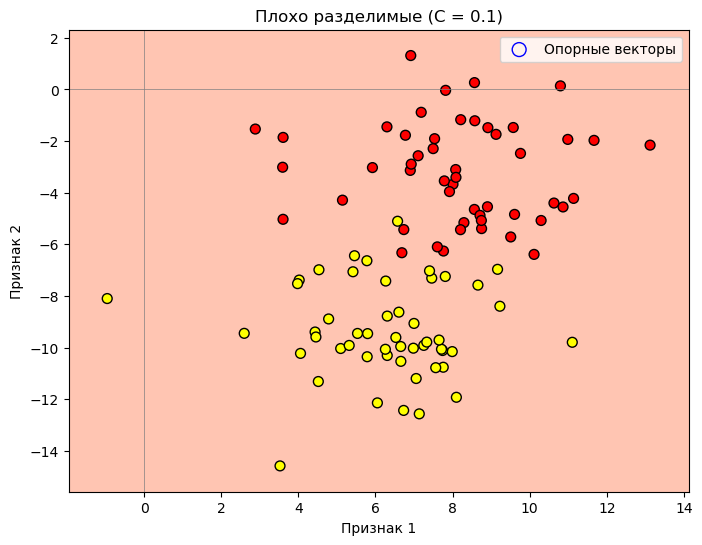

     pcost       dcost       gap    pres   dres
 0:  1.7037e-02  9.0086e+01  6e+02  2e+00  1e+02
 1:  6.7028e-02 -3.9867e+01  4e+02  2e+00  9e+01
 2:  2.4289e-02  1.8589e+02  5e+02  2e+00  9e+01
 3:  2.6152e-04  9.0549e+02  4e+02  1e+00  7e+01
 4:  1.3020e-04  3.2181e+03  6e+02  1e+00  6e+01
 5:  2.6464e-05  1.8932e+04  1e+03  1e+00  6e+01
 6:  1.8409e-05  8.2194e+04  4e+03  1e+00  6e+01
 7:  1.1923e-05  4.3802e+05  2e+04  1e+00  6e+01
 8:  4.4245e-06  5.1046e+06  1e+05  1e+00  6e+01
 9:  1.8684e-07  1.8409e+08  9e+05  1e+00  6e+01
10:  3.4324e-10  3.7369e+10  8e+06  1e+00  6e+01
11:  6.6171e-14  1.8069e+14  5e+08  1e+00  6e+01
12:  9.2306e-15  3.9970e+19  4e+13  1e+00  1e+06
13:  1.1570e-18  3.7199e+25  6e+17  1e+00  5e+12
14:  2.6189e-22  2.2117e+33  7e+23  1e+00  2e+18
15:  1.2345e-25  6.7077e+42  4e+31  1e+00  1e+28
16:  1.2345e-25  3.2074e+45  2e+34  1e+00  7e+30
17:  1.2345e-25  2.7180e+46  2e+35  1e+00  3e+31
18:  1.2345e-25  6.2384e+46  3e+35  1e+00  6e+31
19:  1.2345e-25  4.16

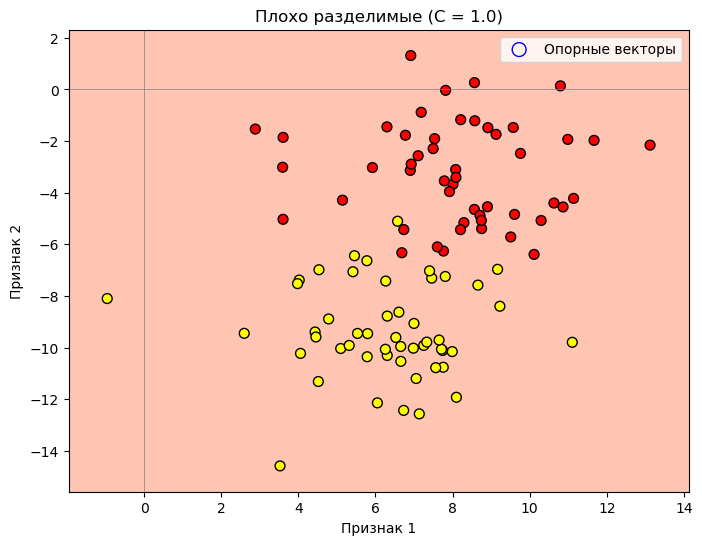

     pcost       dcost       gap    pres   dres
 0:  1.7037e-02  9.0086e+01  6e+02  3e-01  1e+02
 1:  6.7028e-02 -3.9867e+01  4e+02  2e-01  9e+01
 2:  2.4289e-02  1.8589e+02  5e+02  2e-01  9e+01
 3:  2.6152e-04  9.0549e+02  4e+02  2e-01  7e+01
 4:  1.3020e-04  3.2181e+03  6e+02  2e-01  6e+01
 5:  2.6464e-05  1.8932e+04  1e+03  1e-01  6e+01
 6:  1.8409e-05  8.2194e+04  4e+03  1e-01  6e+01
 7:  1.1923e-05  4.3802e+05  2e+04  1e-01  6e+01
 8:  4.4245e-06  5.1046e+06  1e+05  1e-01  6e+01
 9:  1.8684e-07  1.8409e+08  9e+05  1e-01  6e+01
10:  3.4102e-10  3.7374e+10  8e+06  1e-01  6e+01
11:  6.6795e-14  1.8129e+14  5e+08  1e-01  1e+02
12:  6.7572e-18  6.3047e+19  2e+12  1e-01  1e+06
13:  6.9660e-22  2.1104e+27  7e+17  1e-01  4e+11
14:  7.2771e-26  6.4880e+36  2e+25  1e-01  6e+21
15:  4.8930e-26  3.2423e+43  1e+32  1e-01  5e+27
16:  4.8919e-26  1.0022e+47  4e+35  1e-01  3e+31
17:  4.8919e-26  1.1023e+48  4e+36  1e-01  3e+32
18:  4.8919e-26  2.5511e+48  9e+36  1e-01  3e+33
19:  4.8919e-26  1.70

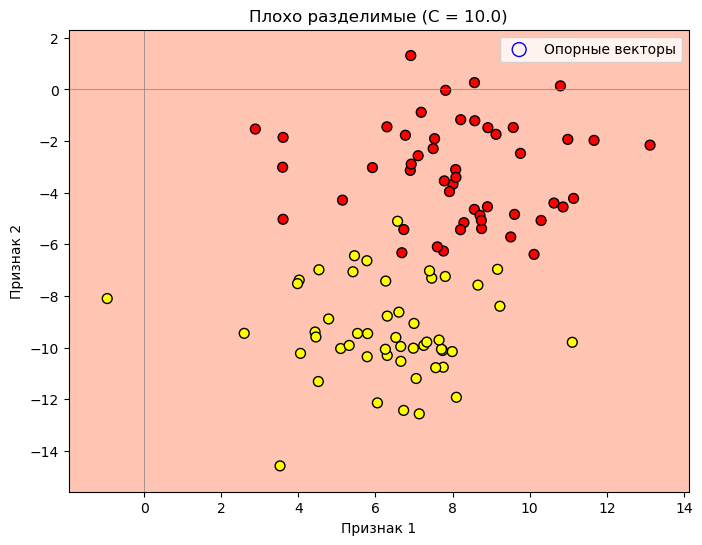

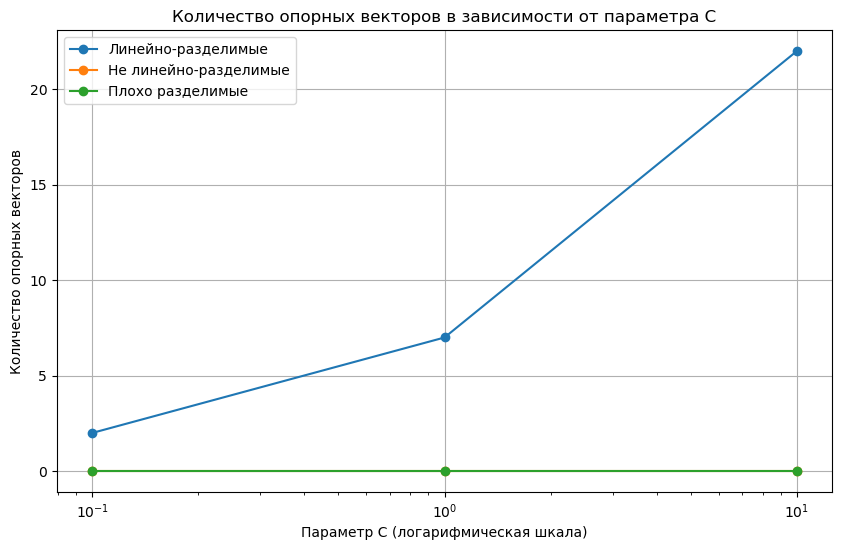

In [22]:
import numpy as np
from cvxopt import matrix, solvers
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        P = np.diag(np.ones(n_features))
        P = np.concatenate((P, np.zeros((n_features, 1))), axis=1)
        P = np.concatenate((P, np.zeros((1, n_features + 1))), axis=0)

        y_reshaped = y.reshape(-1, 1)
        q = np.zeros(n_features + 1)

        G = np.zeros((2 * n_samples, n_features + 1))
        h = np.zeros(2 * n_samples)

        for i in range(n_samples):
            G[i, :n_features] = -y[i] * X[i]
            G[i, n_features] = 0
            h[i] = -1
            
            G[n_samples + i, :n_features] = y[i] * X[i]
            G[n_samples + i, n_features] = -1
            h[n_samples + i] = self.C

        P = matrix(P)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)

        solution = solvers.qp(P, q, G, h)
        self.w = np.array(solution['x'][:-1]).flatten()
        self.b = solution['x'][-1]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

def generate_datasets():
    datasets_list = []

    X1, y1 = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
    y1 = np.where(y1 == 0, -1, 1)
    datasets_list.append((X1, y1, "Линейно-разделимые"))

    X2, y2 = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1)
    y2 = np.where(y2 == 0, -1, 1)
    datasets_list.append((X2, y2, "Не линейно-разделимые"))

    X3, y3 = datasets.make_blobs(n_samples=100, centers=2, cluster_std=2.0, random_state=6)
    y3 = np.where(y3 == 0, -1, 1)
    datasets_list.append((X3, y3, "Плохо разделимые"))

    return datasets_list

def plot_decision_boundary(svm, X, y, title, C):
    plt.figure(figsize=(8, 6))
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='autumn')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k', s=50)

    if svm.w is not None:
        margins = np.abs(np.dot(X, svm.w) + svm.b)
        support_vectors = margins < 1
        plt.scatter(X[support_vectors, 0], X[support_vectors, 1], 
                    facecolors='none', s=100, edgecolors='blue', label='Опорные векторы')

    plt.title(f"{title} (C = {C})")
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.legend(loc='best')
    plt.show()
    
    return np.sum(support_vectors)  # Возвращаем количество опорных векторов

if __name__ == "__main__":
    datasets = generate_datasets()
    
    C_values = [0.1, 1.0, 10.0]
    results = {title: [] for _, _, title in datasets}

    for X, y, title in datasets:
        for C in C_values:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            svm = LinearSVM(C=C)
            svm.fit(X_train, y_train)
            n_support_vectors = plot_decision_boundary(svm, X, y, title, C)
            results[title].append(n_support_vectors)

    # Визуализация зависимости количества опорных векторов от параметра C
    plt.figure(figsize=(10, 6))
    for title, counts in results.items():
        plt.plot(C_values, counts, marker='o', label=title)
    
    plt.xscale('log')
    plt.xticks(C_values)
    plt.xlabel('Параметр C (логарифмическая шкала)')
    plt.ylabel('Количество опорных векторов')
    plt.title('Количество опорных векторов в зависимости от параметра C')
    plt.legend()
    plt.grid()
    plt.show()


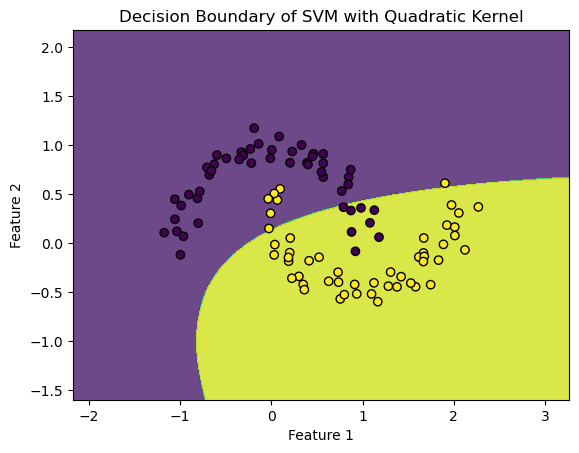

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=100, noise=0.1, random_state=42)


def feature_transform(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    return np.column_stack((x1, x2, x1**2, x2**2, x1*x2))

X_transformed = feature_transform(X)


clf = SVC(kernel='linear')
clf.fit(X_transformed, y)


def plot_decision_boundary(clf, X):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = clf.predict(feature_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of SVM with Quadratic Kernel')
    plt.show()

plot_decision_boundary(clf, X)


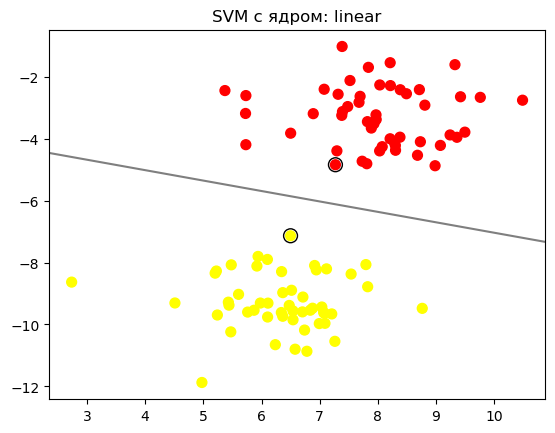

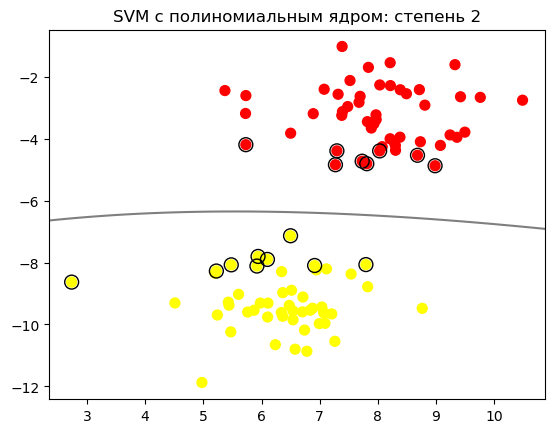

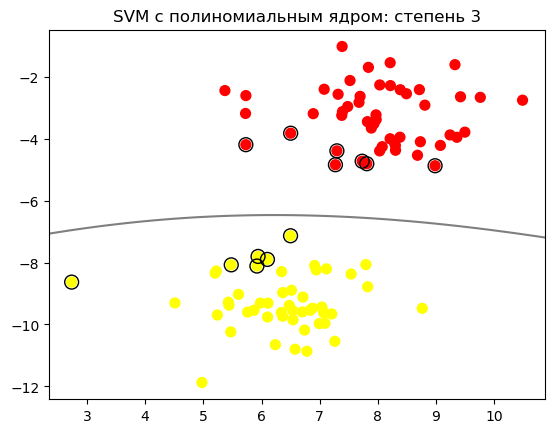

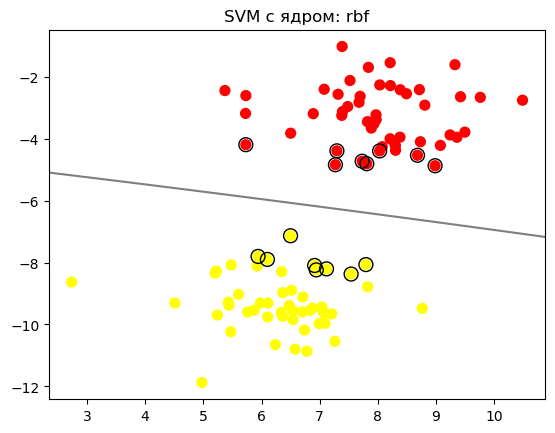

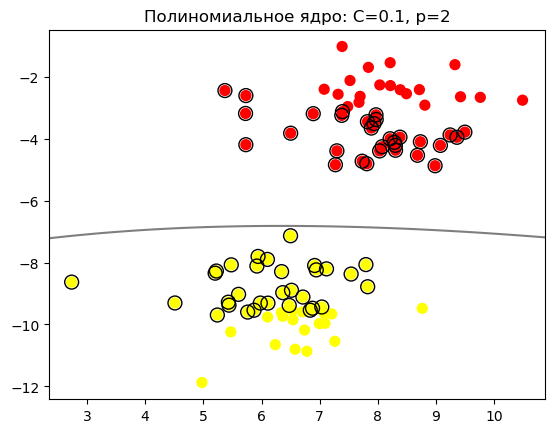

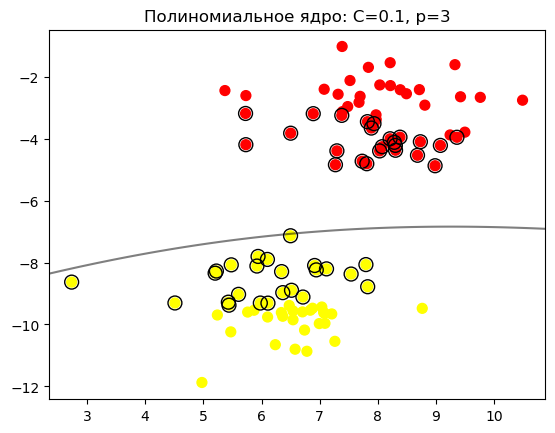

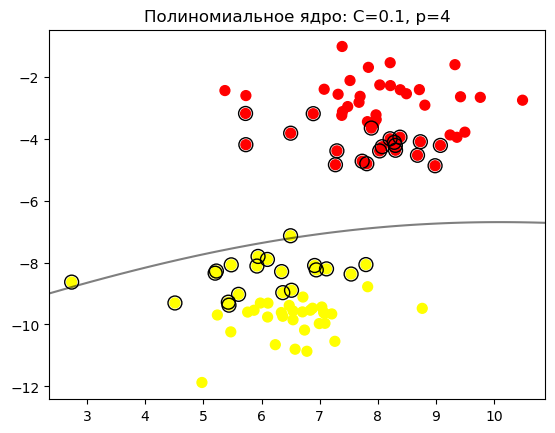

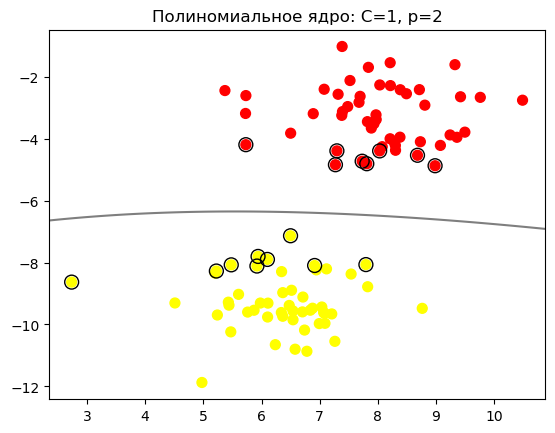

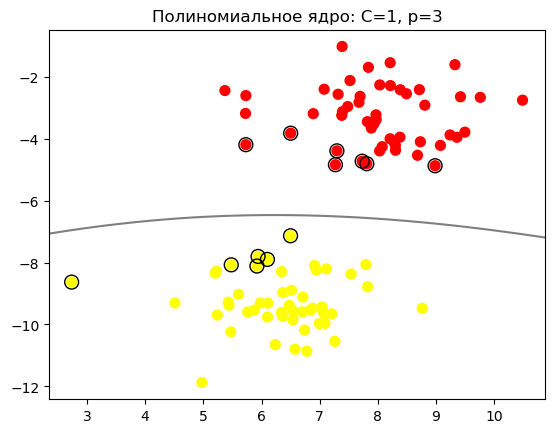

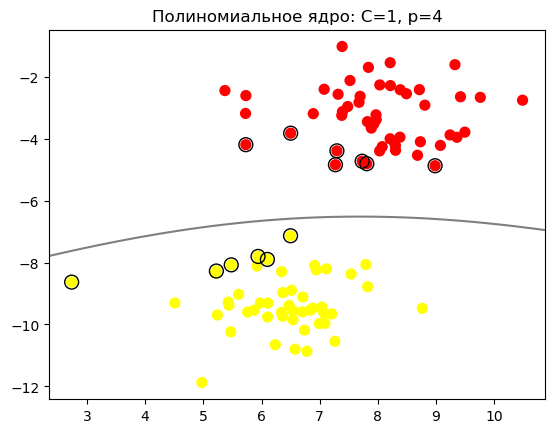

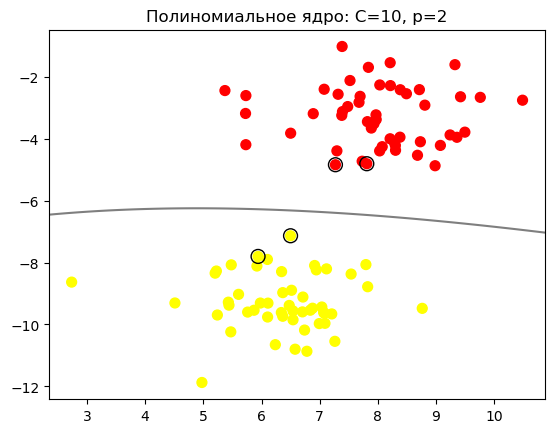

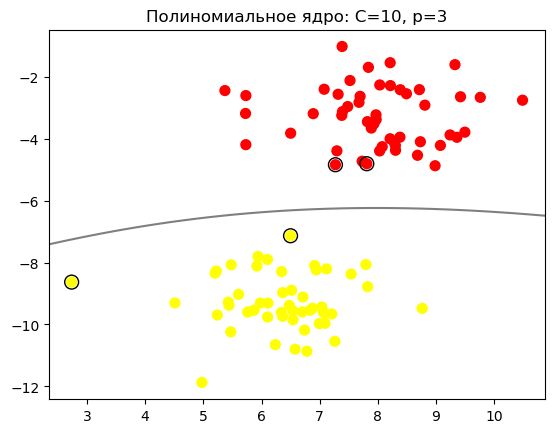

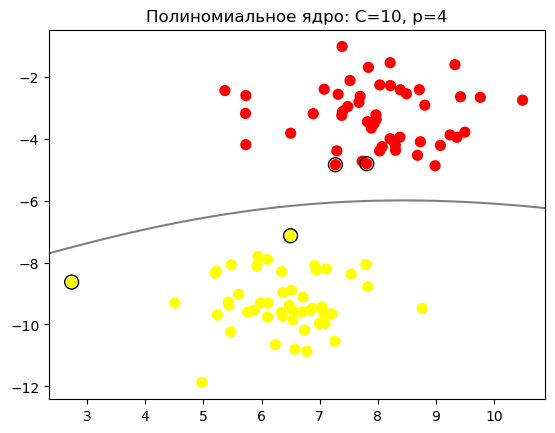

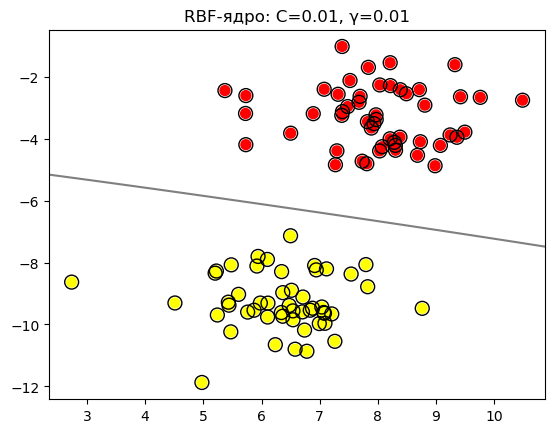

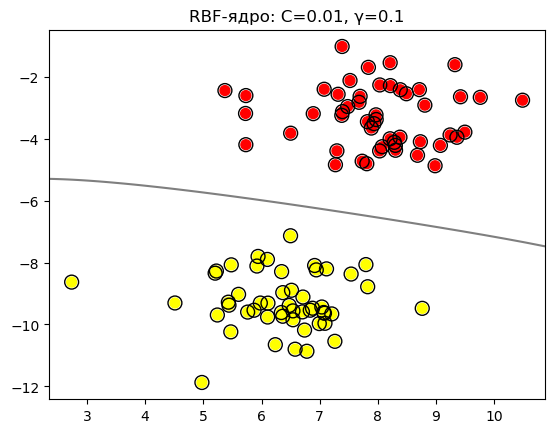

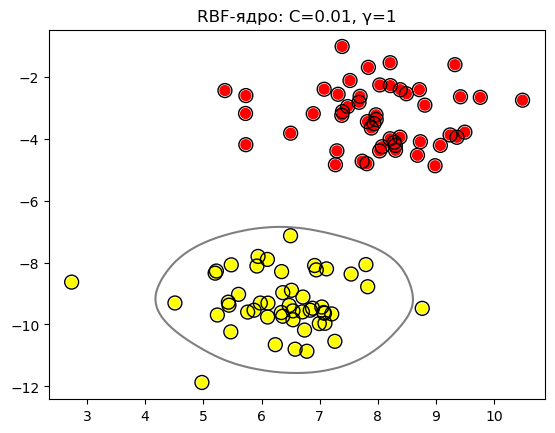

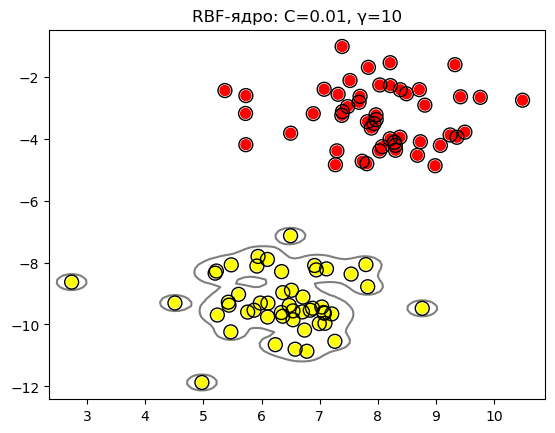

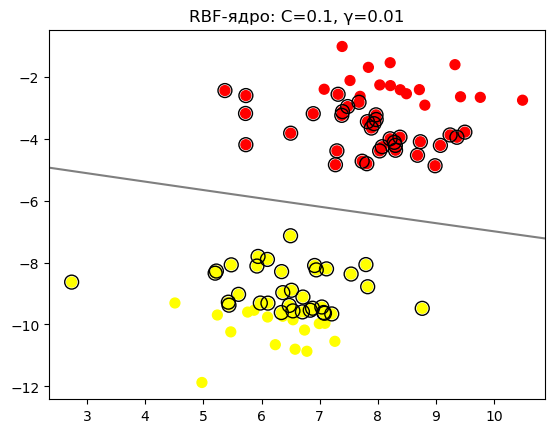

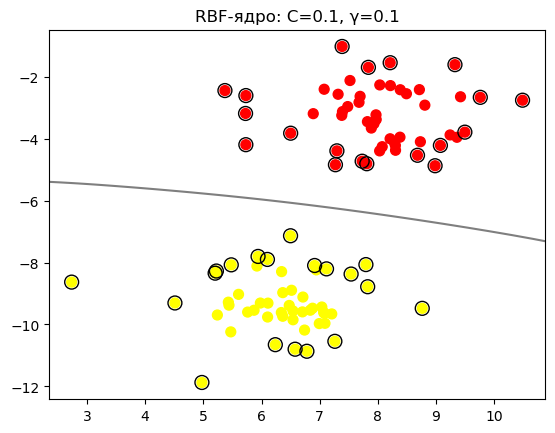

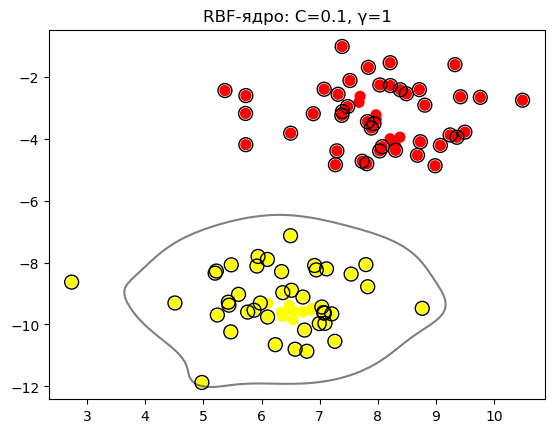

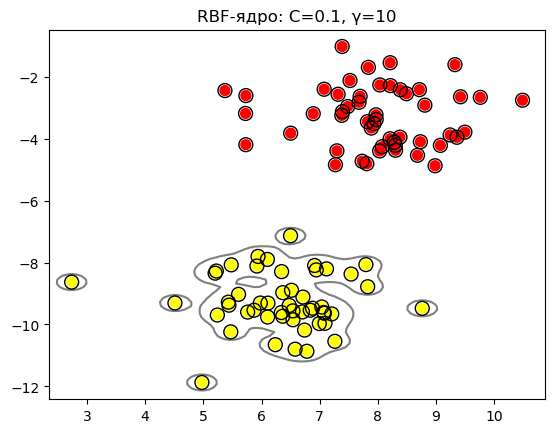

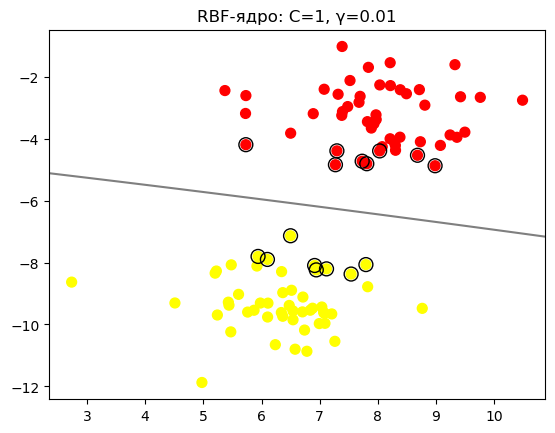

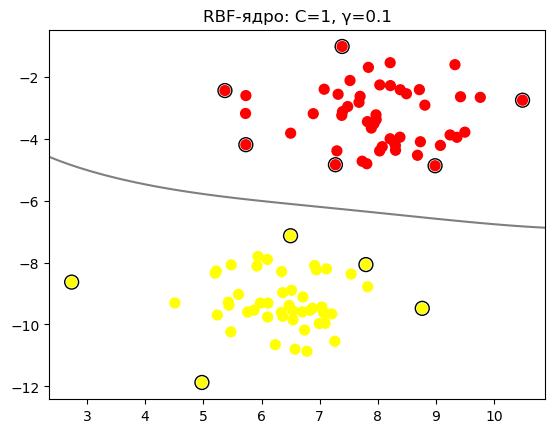

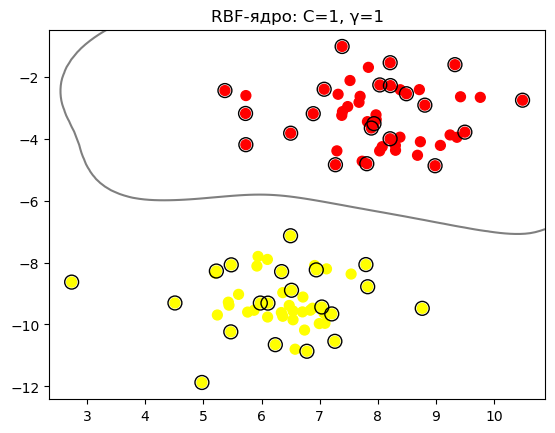

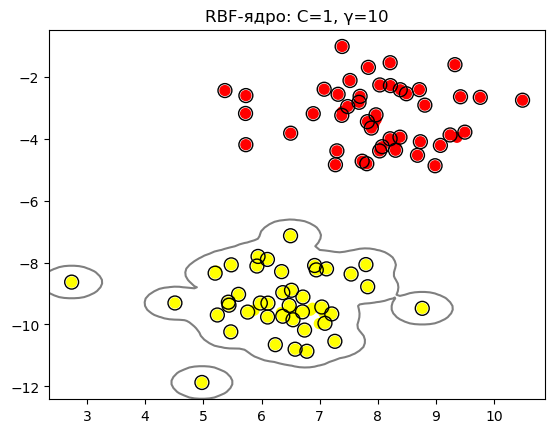

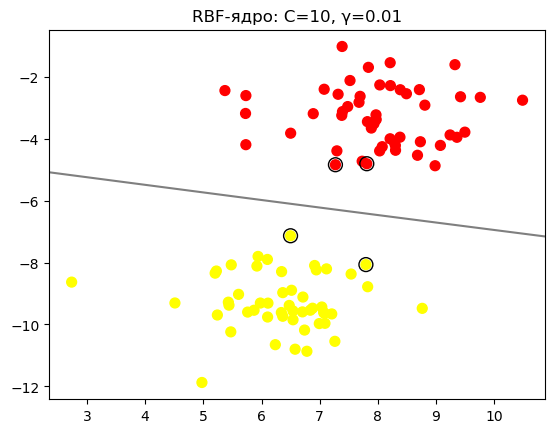

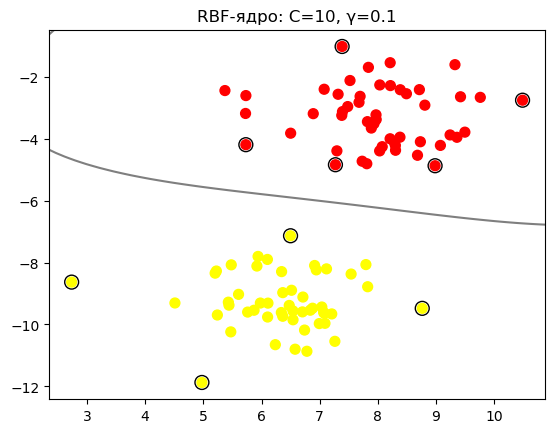

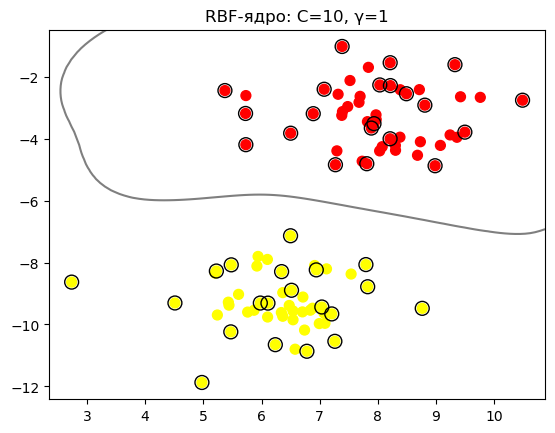

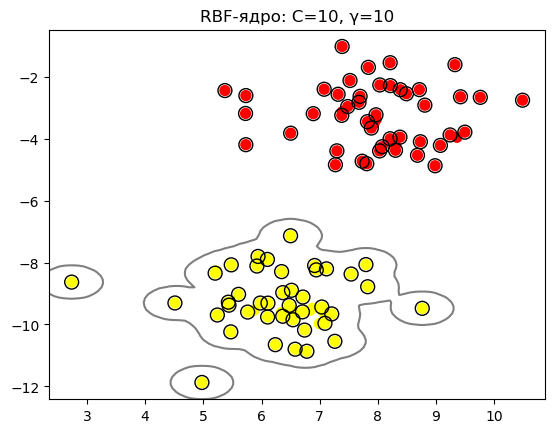

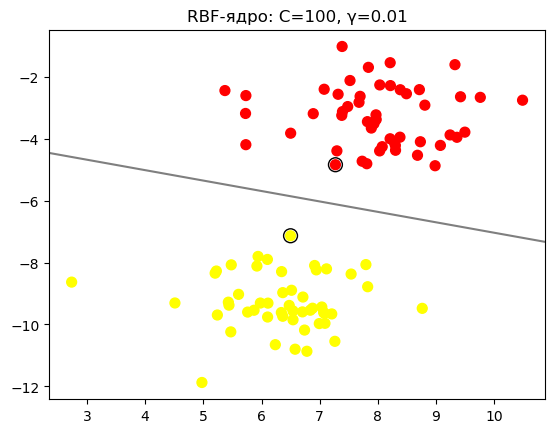

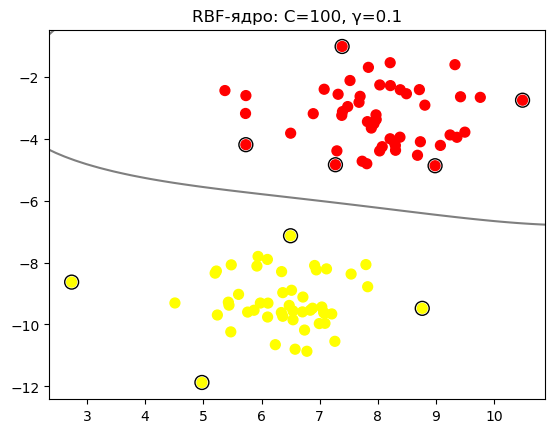

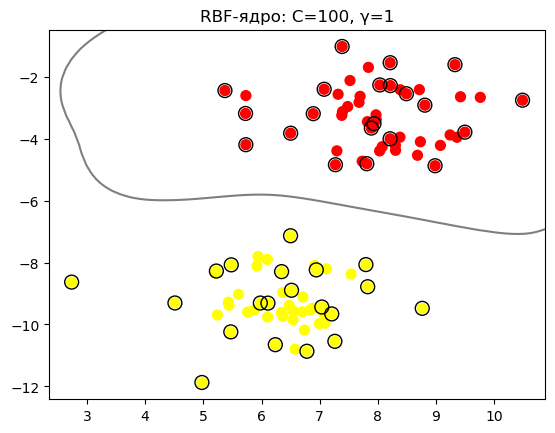

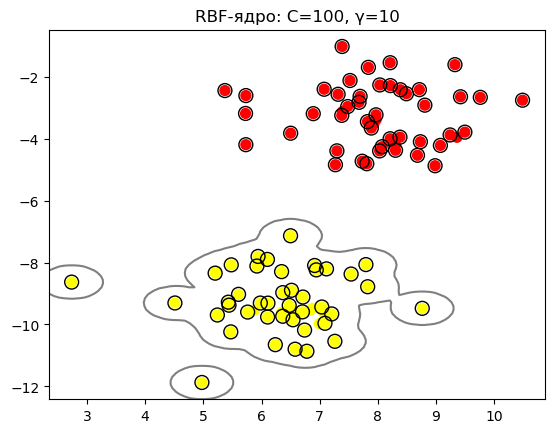

In [46]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)
def plot_svm(svc, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5)
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')


def test_kernels(X, y):
    kernels = ['linear', 'poly', 'rbf']
    p_values = [2, 3]  
    for kernel in kernels:
        if kernel == 'poly':
            for p in p_values:
                svc = SVC(kernel=kernel, degree=p, C=1.0)
                svc.fit(X, y)
                plt.figure()
                plot_svm(svc, X, y)
                plt.title(f'SVM с полиномиальным ядром: степень {p}')
                plt.show()
        else:
            svc = SVC(kernel=kernel, C=1.0)
            svc.fit(X, y)
            plt.figure()
            plot_svm(svc, X, y)
            plt.title(f'SVM с ядром: {kernel}')
            plt.show()

test_kernels(X, y)

C_values = [0.1, 1, 10]
p_values = [2, 3, 4]

for C in C_values:
    for p in p_values:
        svc = SVC(kernel='poly', degree=p, C=C)
        svc.fit(X, y)
        plt.figure()
        plot_svm(svc, X, y)
        plt.title(f'Полиномиальное ядро: C={C}, p={p}')
        plt.show()


C_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1, 10]

for C in C_values:
    for gamma in gamma_values:
        svc = SVC(kernel='rbf', C=C, gamma=gamma)
        svc.fit(X, y)
        plt.figure()
        plot_svm(svc, X, y)
        plt.title(f'RBF-ядро: C={C}, γ={gamma}')
        plt.show()
